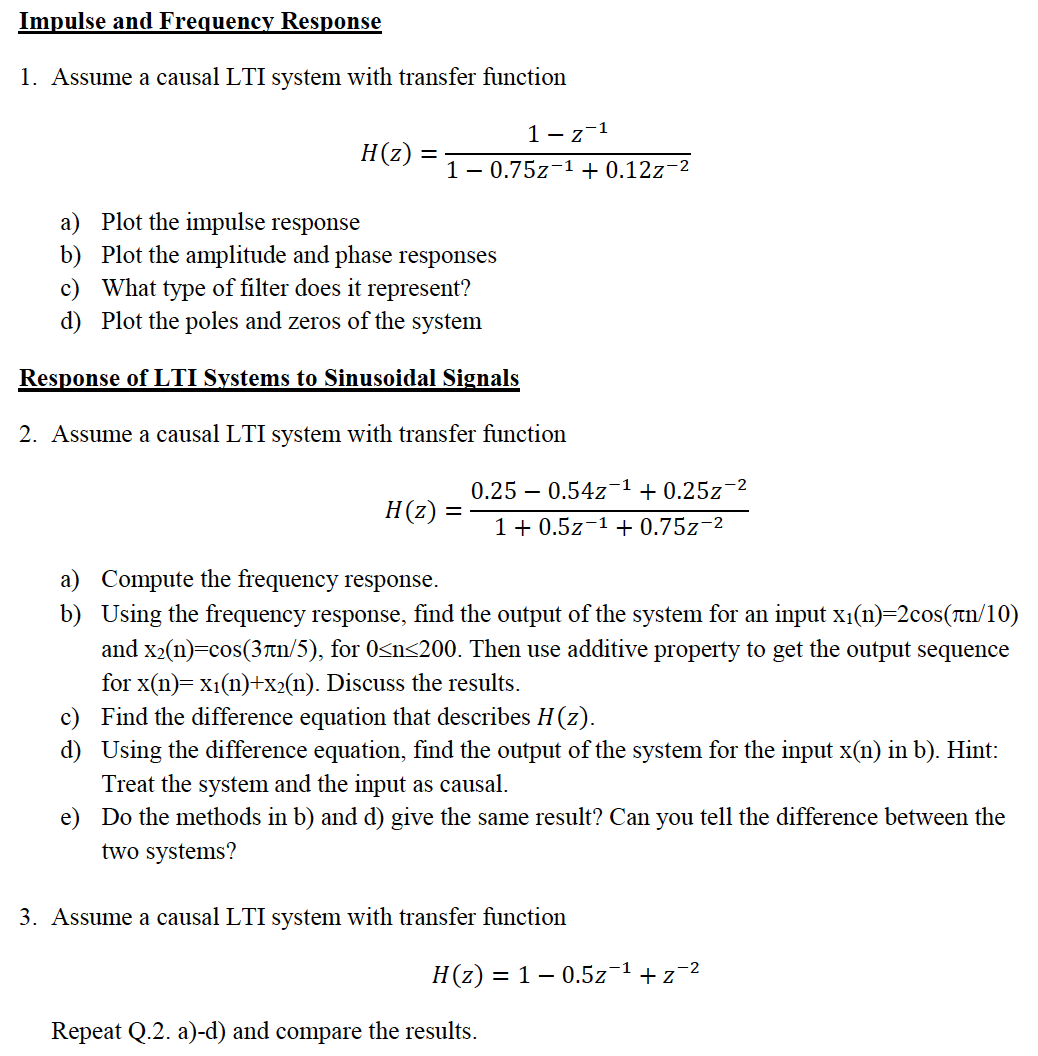

In [ ]:
## DSP Libraries
! pip install control
! pip install audiolazy
! pip install PyDynamic
!pip install lcapy

# Problem) 1

## a) impluse response

In [ ]:
#https://stackoverflow.com/questions/43264959/is-there-a-way-to-do-inverse-z-transforms-in-python

import lcapy as lc
from lcapy.discretetime import z
from pylab import *
import scipy.signal as signal
import numpy as np
import matplotlib.pyplot as plt
import math

X0= ( 1- (z**-1)) / (1- (0.75 * (z**-1))) + (0.12 *(z**-2))
xk=X0.IZT()
print( xk)
print("")
print ("impulse response = (-3/4) power of (n/3)) + (4/3 * u[n]) + (3/25 *u[n-2])")

Piecewise((-(3/4)**n/3 + 4*UnitImpulse(n)/3 + 3*UnitImpulse(n - 2)/25, n >= 0))

impulse response = (-3/4) power of (n/3)) + (4/3 * u[n]) + (3/25 *u[n-2])


### h[n]

In [ ]:

from pylab import *
import scipy.signal as signal
import numpy as np
import matplotlib.pyplot as plt
import math

#Plot frequency and phase response
def mfreqz(h,a=1):
    w,h = signal.freqz(h,a)
    h_dB = 20 * log10 (abs(h))

    fig, ax1 = plt.subplots(1,1,figsize=(10,5))
    h_Phase = unwrap(arctan2(imag(h),real(h)))
    plot(w/max(w),h_Phase,'g')
    ylabel("Phase (radians)")
    xlabel(r"Normalized Frequency (x$\pi$rad/sample)")
    title(r"Phase response")
    subplots_adjust(hspace=0.5)

#Plot step and impulse response
def impz(h,n,a=1):
   l = len(h)
   impulse = repeat(0.,l); impulse[0] =1.
   x = arange(0,l)
   response = signal.lfilter(h,a,impulse)

   fig, ax1 = plt.subplots(1,1,figsize=(10,5))
   step = cumsum(response)
   ax1.stem(x, step,'g')
   ylabel("Amplitude")
   xlabel(r"n (samples)={:.0f},".format(n))
   subplots_adjust(hspace=0.5)


n: 0, y[n] => -1.6667 
n: 1, y[n] => -0.5565 


Text(0.5, 1.0, 'h[n]')

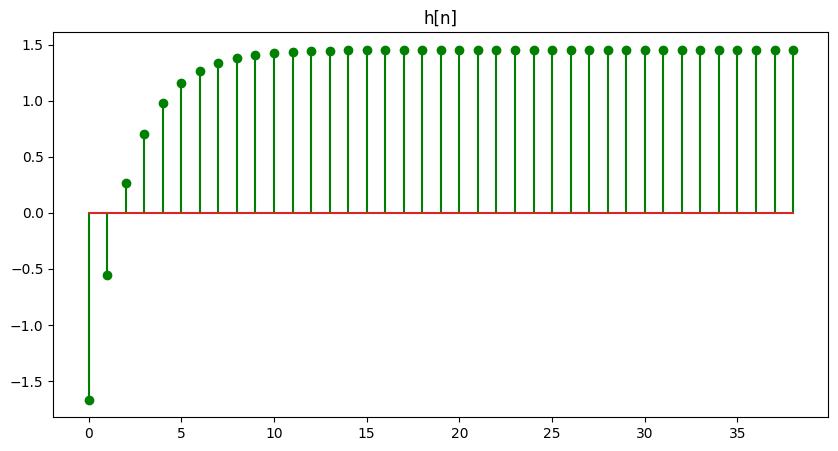

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import math
y=[]

n = range(0, 39, 1)

for i in range(len(n)):

    #d = (1 if n[i]==0 else 0)

    u = (1 if n[i]>=0 else 0)

    x0= ((-3/4** (i/3)) + (4/3 * u ))
    x= ((-3/4** (i/3)) + (4/3 * u) + (3/25 * u))
    #print(x.numpy())

    if n[i]>=2 :
       y.append(x)
    else:
       #print(y[i-1])
       y.append(x0)
       print('n: {:.0f}, y[n] => {:.4f} '.format(int(i), y[i]))


# PLOT
fig, ax1 = plt.subplots(1,1,figsize=(10,5))
n = range(0, 39, 1)
ax1.stem(n, y, 'g')
plt.title('h[n]')

## b) amplitude and phase response

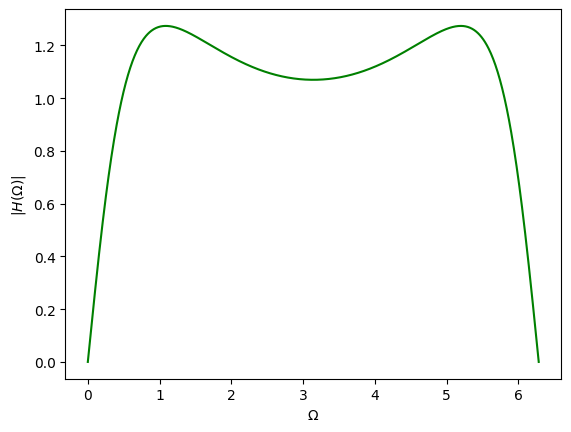

In [ ]:
#https://stackoverflow.com/questions/37833940/frequency-response-scipy-signal
def H(z):
    num =1 - (z**-1)
    denom = 1 - 0.75*(z**-1) + 0.12*(z**-2)
    return num/denom

import numpy as np
import matplotlib.pyplot as plt
# Setting the fontsize of the axis label to 20
plt.xlabel("$\Omega$", fontsize=10)
plt.ylabel("$|H(\Omega)|$", fontsize=10)
w_range = np.linspace(0, 2*np.pi, 1000)
plt.plot(w_range, np.abs(H(np.exp(1j*w_range))),'g')
plt.show()

## d) poles and zeros

Zeros = [1.]
Poles = [0.51861407 0.23138593]
Gain = 1.0


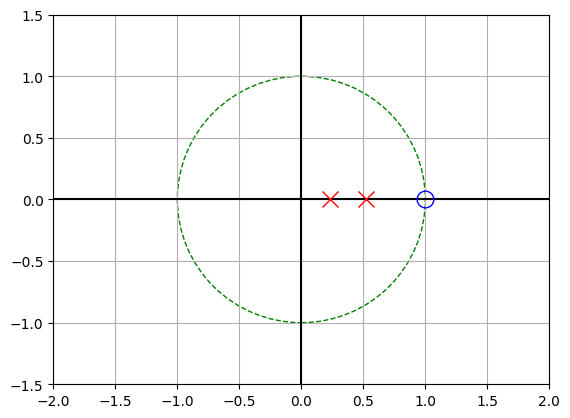

In [ ]:
#https://github.com/celine-hsieh/Digital_Signal_Processing/blob/main/z_transform/10_1%20tf2zpk.py
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
from matplotlib import patches
from matplotlib.markers import MarkerStyle

def zplane(z, p):
	fig = plt.figure( )
	ax = plt.subplot( 1, 1, 1 )
	unit_circle = patches.Circle( ( 0,0 ), radius = 1, fill = False, color = 'green', ls = 'dashed' )
	ax.add_patch( unit_circle )
	plt.axvline( 0, color = 'black' )
	plt.axhline( 0, color = 'black' )
	plt.xlim( ( -2, 2 ) )
	plt.ylim( ( -1.5, 1.5 ) )
	plt.grid( )
	plt.plot( z.real, z.imag, 'bo' , fillstyle = 'none', ms = 12)
	plt.plot( p.real, p.imag, 'rx', fillstyle = 'none', ms = 12)
	return fig

def main( ):
	a1 = np.array( [ 1, -1 ] )
	a2 = np.array( [ 1, -0.75, 0.12 ] )
	z, p, k = signal.tf2zpk( a1, a2 )
	print( "Zeros =", z )
	print( "Poles =", p )
	print( "Gain =", k )
	zplane( z, p )
	plt.savefig ('10-1 (a).png')
	plt.show( )

main( )

# Problem 2

## a)

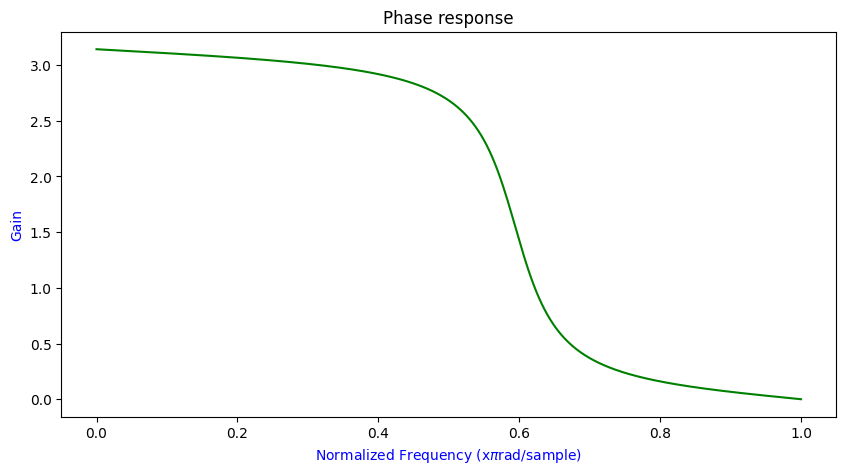

In [ ]:
#https://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.signal.freqz.html

a1 = np.array( [ 0.25, -0.54,0.25 ] )
a2 = np.array( [ 1, 0.5, 0.75 ] )
w,h = signal.freqz(a1,a2)
h_dB = 20 * log10 (abs(h))
fig, ax1 = plt.subplots(1,1,figsize=(10,5))
h_Phase = unwrap(arctan2(imag(h),real(h)))
plot(w/max(w),h_Phase,'g')
ylabel("Gain", color='b')
xlabel(r"Normalized Frequency (x$\pi$rad/sample)", color='b')
title(r"Phase response")
subplots_adjust(hspace=0.5)
show()

## b)

### Plotting generated ssampels for 0<n<200

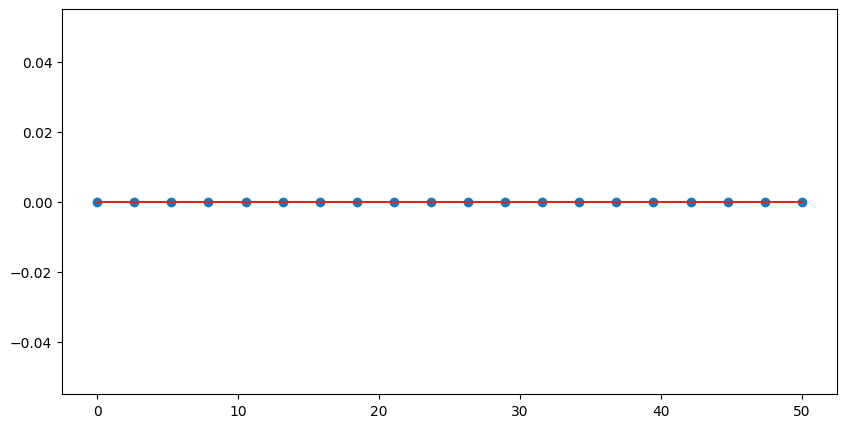

In [ ]:
import matplotlib.pyplot as plt
N = 20
y = np.zeros(N)
x2 = np.linspace(0, 50, N, endpoint=True)
fig, ax1 = plt.subplots(1,1,figsize=(10,5))
n = range(0, 200, 1)
ax1.stem(x2, y )
plt.show()

### Output of  x = 2cos(pi*n/10) for 0<n<200     

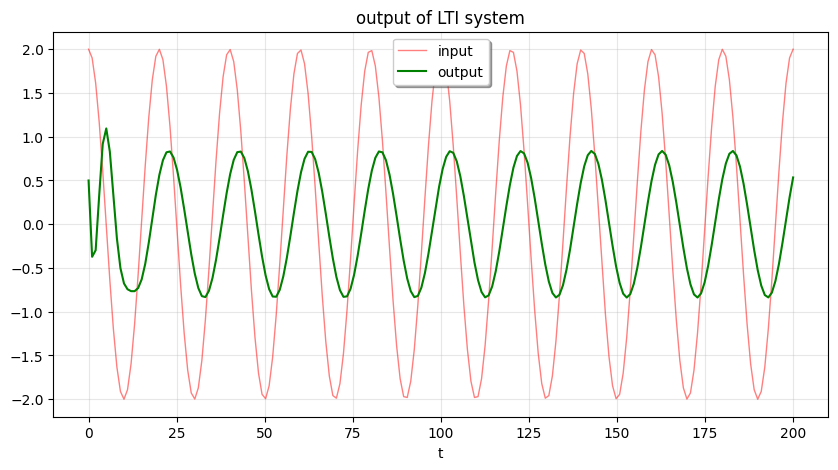

In [ ]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lsim.html#scipy.signal.lsim
import numpy as np
from scipy.signal import bessel, lsim
import matplotlib.pyplot as plt
import lcapy as lc
from lcapy.discretetime import z
from pylab import *
import scipy.signal as signal
import numpy as np
import matplotlib.pyplot as plt
import math

b = np.array( [ 0.25, -0.54,0.25 ] )
a= np.array( [ 1, 0.5, 0.75 ] )
#Generate data to which the filter is applied.
N = 200
y = np.zeros(N)
t = np.linspace(0, 200, N, endpoint=True)
u= 2 *(np.cos(np.pi*t/10))
#Simulate the filter with lsim.
tout, yout, xout = lsim((b, a), U=u, T=t)
#Plot the result.
fig, ax1 = plt.subplots(1,1,figsize=(10,5))
plt.plot(t, u, 'r', alpha=0.5, linewidth=1, label='input')
plt.plot(tout, yout, 'g', linewidth=1.5, label='output')
plt.legend(loc='best', shadow=True, framealpha=1)
plt.grid(alpha=0.3)
plt.xlabel('t')
title(r"output of LTI system")
plt.show()

### Output of  x = cos(3*pi*n/5)  for 0<n<200       

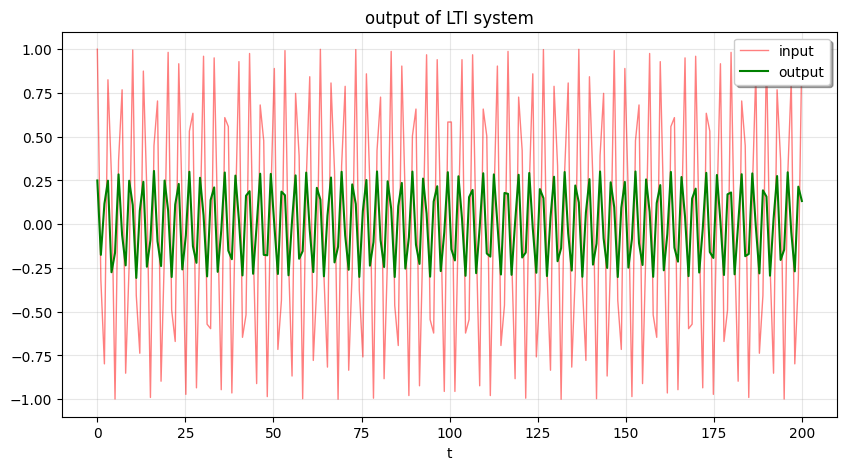

In [ ]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lsim.html#scipy.signal.lsim
import numpy as np
from scipy.signal import bessel, lsim
import matplotlib.pyplot as plt


b = np.array( [ 0.25, -0.54,0.25 ] )
a= np.array( [ 1, 0.5, 0.75 ] )
#Generate data to which the filter is applied.
N = 200
y = np.zeros(N)
t = np.linspace(0, 200, N, endpoint=True)
u= (np.cos((3 *np.pi*t)/5))
#Simulate the filter with lsim.
tout, yout, xout = lsim((b, a), U=u, T=t)
#Plot the result.
fig, ax1 = plt.subplots(1,1,figsize=(10,5))
plt.plot(t, u, 'r', alpha=0.5, linewidth=1, label='input')
plt.plot(tout, yout, 'g', linewidth=1.5, label='output')
plt.legend(loc='best', shadow=True, framealpha=1)
plt.grid(alpha=0.3)
plt.xlabel('t')
title(r"output of LTI system")
plt.show()

### Reponse of x = x1 +x2 based on additive property

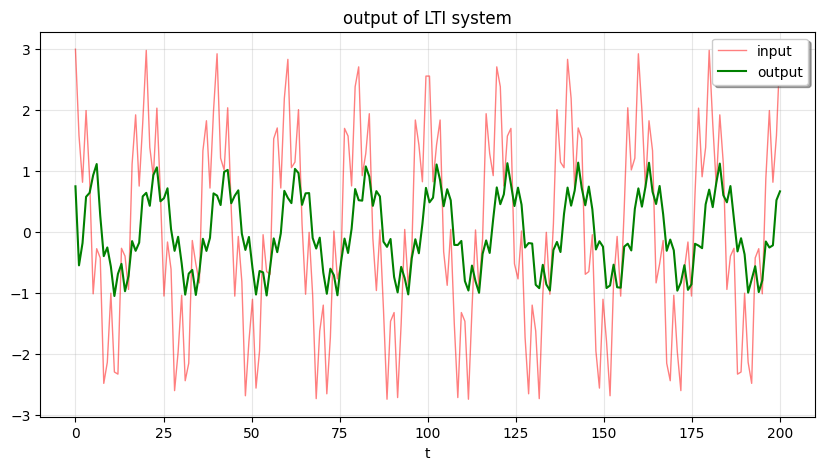

In [ ]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lsim.html#scipy.signal.lsim
import numpy as np
from scipy.signal import bessel, lsim
import matplotlib.pyplot as plt


b = np.array( [ 0.25, -0.54,0.25 ] )
a= np.array( [ 1, 0.5, 0.75 ] )
#Generate data to which the filter is applied.
N = 200
y = np.zeros(N)
t = np.linspace(0, 200, N, endpoint=True)
u1= 2 *(np.cos(np.pi*t/10))
u2= (np.cos((3 *np.pi*t)/5))
u = u1+u2
#Simulate the filter with lsim.
tout, yout, xout = lsim((b, a), U=u, T=t)
#Plot the result.
fig, ax1 = plt.subplots(1,1,figsize=(10,5))
plt.plot(t, u, 'r', alpha=0.5, linewidth=1, label='input')
plt.plot(tout, yout, 'g', linewidth=1.5, label='output')
plt.legend(loc='best', shadow=True, framealpha=1)
plt.grid(alpha=0.3)
plt.xlabel('t')
title(r"output of LTI system")
plt.show()

## c) Find the difference equation that describes 𝐻(𝑧)

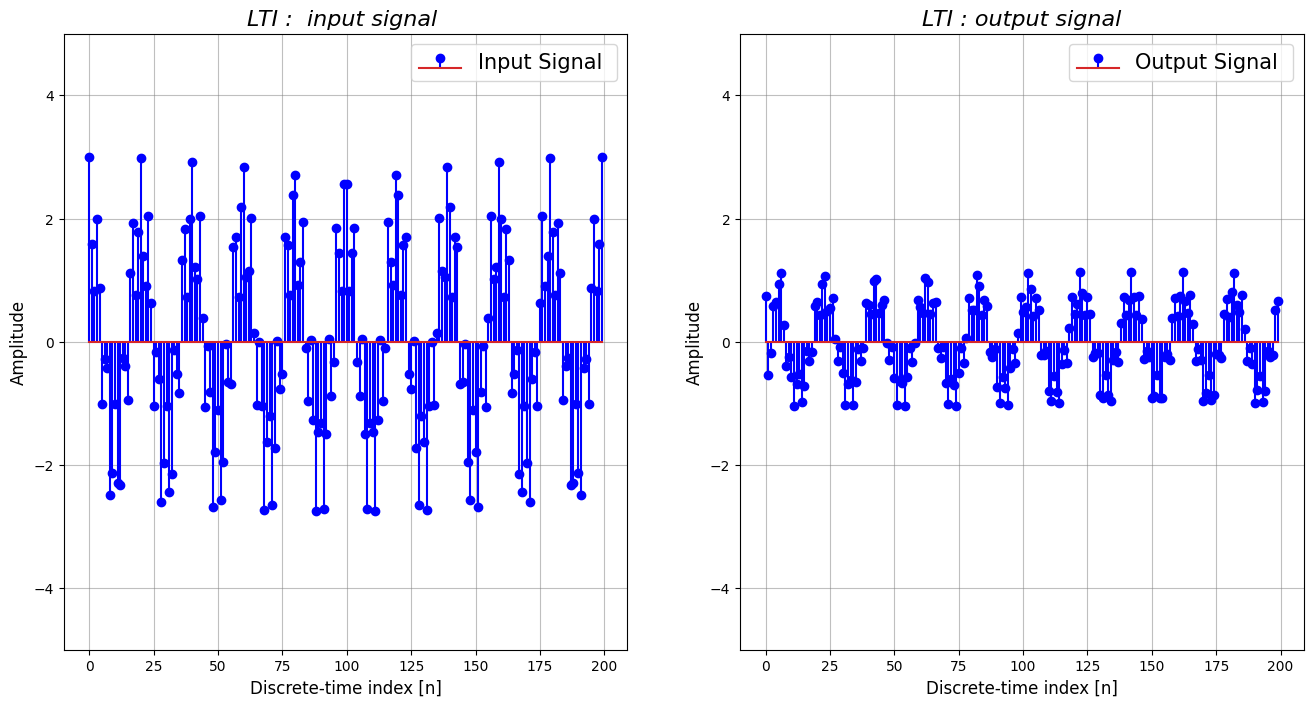

In [ ]:
#https://github.com/jimmyg1997/Python-Digital-Signal-Processing-Basics/blob/main/LTI%20-%20Transfer%20Function%20Estimation%20-%20Impulse%20Step%20Response%20-%20Zero%20Pole%20-%20ROC.ipynb

## 1. Define `x[n]` and `y[n]`
N = 200
n = np.arange(0, N ,1, dtype = float)
u1= 2 *(np.cos(np.pi*t/10))
u2= (np.cos((3 *np.pi*t)/5))
x = u1+u2
y= yout

## 2. Visualize
fig, axs = plt.subplots(1,2, figsize = (16,8))
axs[0].stem(n, x, linefmt = '-b',  markerfmt='bo', label = r"Input Signal ")
axs[0].set_title(r"LTI :  input signal ", size = 16, style = 'italic')
axs[1].stem(n, y, linefmt = '-b',  markerfmt='bo', label = r"Output Signal ")
axs[1].set_title(r"LTI : output signal", size = 16, style = 'italic')

for idx in range(2) :
  axs[idx].set_xlabel('Discrete-time index [n]', fontsize = 12)
  axs[idx].set_ylabel('Amplitude',  fontsize = 12)
  axs[idx].grid(True, color = 'gray', alpha = 0.5)
  axs[idx].legend(fancybox = True, prop = {'size': 15})
  axs[idx].set_ylim(-5, 5)
plt.show()

In [ ]:

def display_tf(b, a, mode):
  b = [round(x,3) for x in b]
  a = [round(x,3) for x in a]
  if mode == "inverse" :  b = b[::-1] ; a = a[::-1]
  print()
  print(" "* 7, end = " ")
  print(b[0], end = " ")
  for z_idx in range(1, len(b)):
    if b[z_idx] > 0 : print("+", end = " ")
    if mode == "inverse" :
      print("{}z^({}) ".format(b[z_idx], -z_idx), end = " ")
    else:
      print("{}z^({}) ".format(b[z_idx], z_idx), end = " ")

  print()
  print("H(z) = " + "-"*max( len(b), len(a) ) * 13)
  print(" "* 7, end = " ")
  print(a[0], end = " ")
  for z_idx in range(1, len(a)):
    if a[z_idx] > 0 : print("+", end = " ")
    if mode == "inverse" :
      print("{}z^({}) ".format(a[z_idx], -z_idx), end = " ")
    else:
      print("{}z^({}) ".format(a[z_idx], z_idx), end = " ")
  print()
  print()

# Calculate db
def db(x):
  return 20 * np.log10(np.abs(x) / np.abs(x).max())

In [ ]:

u1= 2 *(np.cos(np.pi*t/10))
u2= (np.cos((3 *np.pi*t)/5))
b1 = u1+u2
a1= yout

#calculate correclty the coefficients of the Z transform in the formation : a0 + a1* z^{-1} + ... + aN * z^
z = sympy.symbols('z')
X = sympy.Poly(np.flipud(b1), z**(-1))
Y = sympy.Poly(np.flipud(a1), z**(-1))

#Calculate Transfer Function H(z)
b3 = np.array( Y.coeffs(), dtype = float)
a3 = np.array( X.coeffs(), dtype = float )
H3 = signal.TransferFunction(b3, a3)


# Display  H(z)
data = pd.DataFrame(np.vstack([x,y]).T, columns = ["Input x[n]", "Output y[n]"], index = n).T
data.index.name = "n-th index"


print("==== Difference Equation that Describes 𝐻(z) ==== ")
display_tf(b3,a3, "inverse")

==== Difference Equation that Describes 𝐻(z) ==== 

        0.75 -0.547z^(-1)  -0.181z^(-2)  + 0.578z^(-3)  + 0.643z^(-4)  + 0.931z^(-5)  + 1.116z^(-6)  + 0.27z^(-7)  -0.396z^(-8)  -0.253z^(-9)  -0.566z^(-10)  -1.05z^(-11)  -0.687z^(-12)  -0.523z^(-13)  -0.972z^(-14)  -0.72z^(-15)  -0.149z^(-16)  -0.309z^(-17)  -0.174z^(-18)  + 0.584z^(-19)  + 0.643z^(-20)  + 0.43z^(-21)  + 0.934z^(-22)  + 1.062z^(-23)  + 0.504z^(-24)  + 0.555z^(-25)  + 0.718z^(-26)  + 0.048z^(-27)  -0.309z^(-28)  -0.078z^(-29)  -0.513z^(-30)  -1.028z^(-31)  -0.683z^(-32)  -0.622z^(-33)  -1.033z^(-34)  -0.651z^(-35)  -0.111z^(-36)  -0.31z^(-37)  -0.096z^(-38)  + 0.634z^(-39)  + 0.597z^(-40)  + 0.443z^(-41)  + 0.987z^(-42)  + 1.019z^(-43)  + 0.472z^(-44)  + 0.596z^(-45)  + 0.684z^(-46)  -0.028z^(-47)  -0.294z^(-48)  -0.081z^(-49)  -0.589z^(-50)  -1.026z^(-51)  -0.64z^(-52)  -0.663z^(-53)  -1.041z^(-54)  -0.576z^(-55)  -0.105z^(-56)  -0.331z^(-57)  -0.024z^(-58)  + 0.675z^(-59)  + 0.559z^(-60)  + 0.474z^(-61)  + 1.036z^(

## d) Using the difference equation, find the output of the system

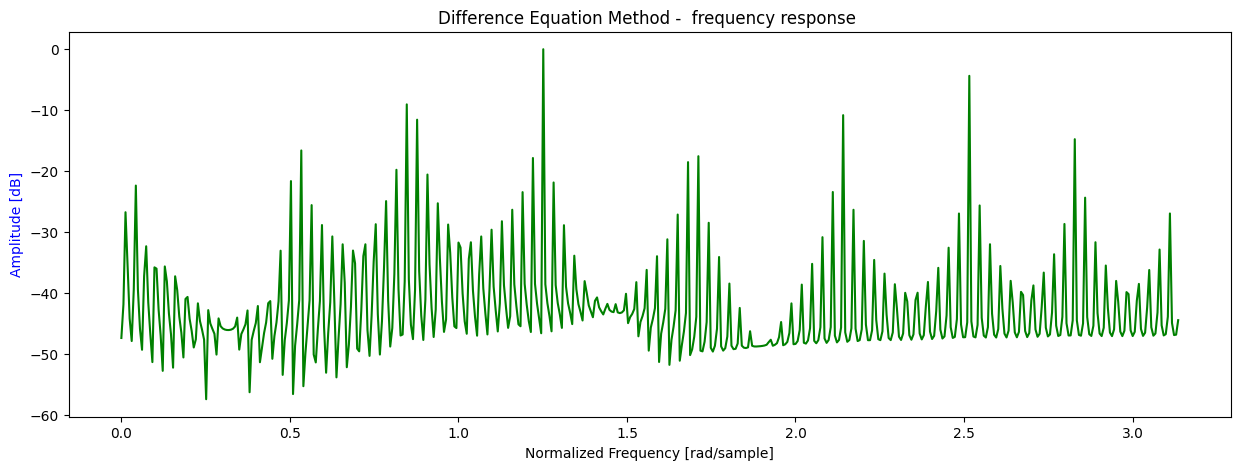

In [ ]:
#Frequency Response
def plot_freq_response(w, Y,  method = ""):
  magnitude = db(abs(Y))
  angles    = np.unwrap(np.angle(Y))
  #fig = plt.figure()
  #ax1 = fig.add_subplot(111)
  fig, ax1 = plt.subplots(1,1,figsize=(15,5))
  plt.title(method + r' frequency response ')
  plt.plot(w, magnitude , 'g', label = "magnitude")
  plt.ylabel('Amplitude [dB]', color='b')
  plt.xlabel('Normalized Frequency [rad/sample]')

## Frequency Calculation
w3, Y3 = signal.freqz(b3, a3)
plot_freq_response(w3, Y3,"Difference Equation Method - ")

italicized text# 3) Assume a causal LTI system with transfer function
###    𝐻(𝑧)=1−0.5𝑧−1+𝑧−2
###    Repeat Q.2. a)-d) and compare the results.

## a)

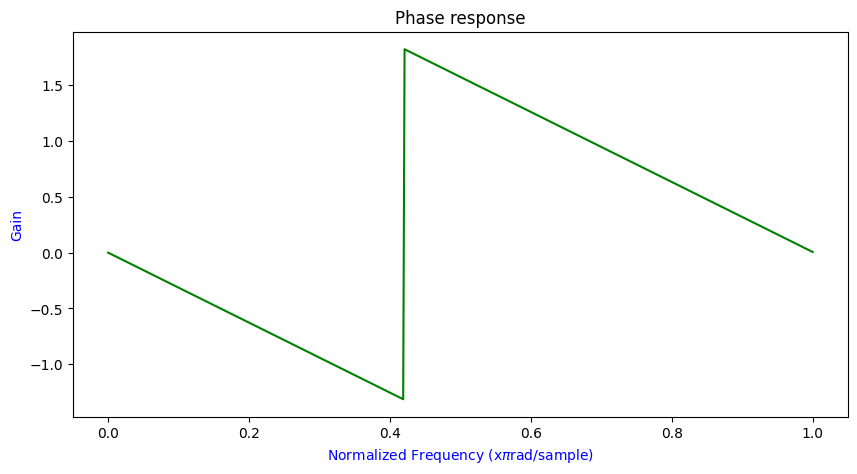

In [ ]:
#https://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.signal.freqz.html
from scipy import signal
a1 = np.array( [ 1, -0.5,1] )
w,h = signal.freqz(a1)
h_dB = 20 * log10 (abs(h))
fig, ax1 = plt.subplots(1,1,figsize=(10,5))
h_Phase = unwrap(arctan2(imag(h),real(h)))
plot(w/max(w),h_Phase,'g')
ylabel("Gain", color='b')
xlabel(r"Normalized Frequency (x$\pi$rad/sample)", color='b')
title(r"Phase response")
subplots_adjust(hspace=0.5)
show()

## b)

### Plotting generated ssampels for 0<n<200

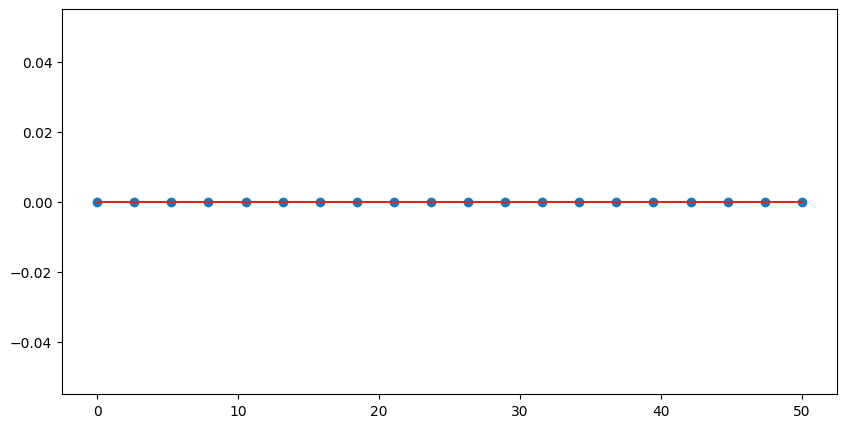

In [ ]:
import matplotlib.pyplot as plt
N = 20
y = np.zeros(N)
x2 = np.linspace(0, 50, N, endpoint=True)
fig, ax1 = plt.subplots(1,1,figsize=(10,5))
n = range(0, 200, 1)
ax1.stem(x2, y )
plt.show()

### Output of  x = 2cos(pi*n/10) for 0<n<200     

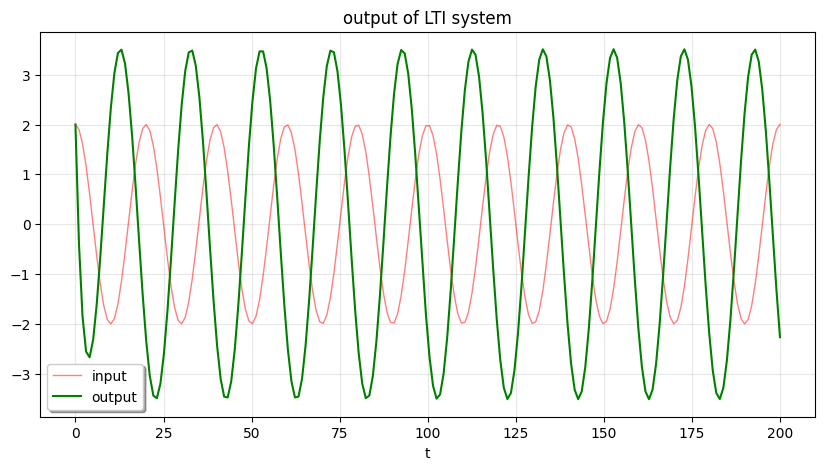

In [ ]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lsim.html#scipy.signal.lsim

b = np.array( [ 1, -0.5,1] )
#Generate data to which the filter is applied.
N = 200
y = np.zeros(N)
t = np.linspace(0, 200, N, endpoint=True)
u= 2 *(np.cos(np.pi*t/10))
#Simulate the filter with lsim.
tout, yout, xout = lsim((b), U=u, T=t)
#Plot the result.
fig, ax1 = plt.subplots(1,1,figsize=(10,5))
plt.plot(t, u, 'r', alpha=0.5, linewidth=1, label='input')
plt.plot(tout, yout, 'g', linewidth=1.5, label='output')
plt.legend(loc='best', shadow=True, framealpha=1)
plt.grid(alpha=0.3)
plt.xlabel('t')
title(r"output of LTI system")
plt.show()

### Output of  x = cos(3*pi*n/5)  for 0<n<200       

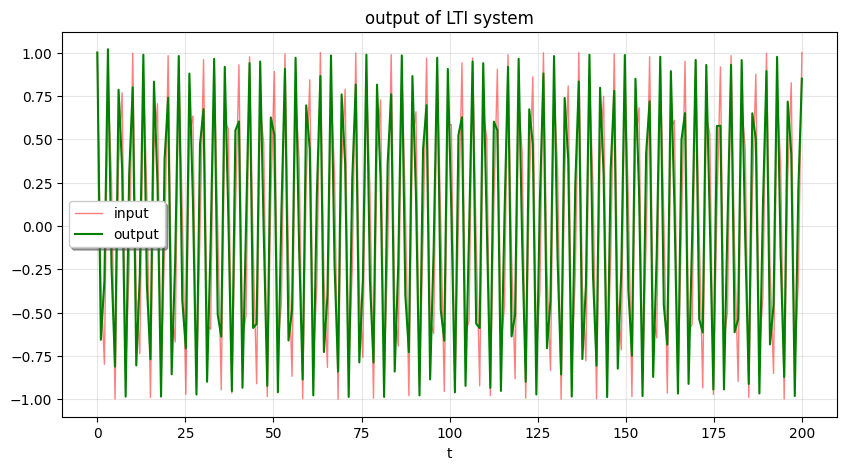

In [ ]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lsim.html#scipy.signal.lsim

b = np.array( [ 1, -0.5,1] )
#Generate data to which the filter is applied.
N = 200
y = np.zeros(N)
t = np.linspace(0, 200, N, endpoint=True)
u= (np.cos((3 *np.pi*t)/5))
#Simulate the filter with lsim.
tout, yout, xout = lsim((b), U=u, T=t)
#Plot the result.
fig, ax1 = plt.subplots(1,1,figsize=(10,5))
plt.plot(t, u, 'r', alpha=0.5, linewidth=1, label='input')
plt.plot(tout, yout, 'g', linewidth=1.5, label='output')
plt.legend(loc='best', shadow=True, framealpha=1)
plt.grid(alpha=0.3)
plt.xlabel('t')
title(r"output of LTI system")
plt.show()

### Reponse of x = x1 +x2 based on additive property

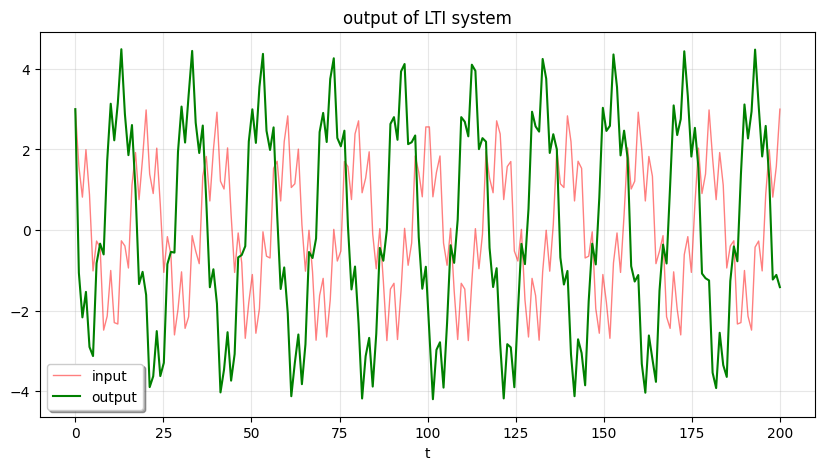

In [ ]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lsim.html#scipy.signal.lsim

b = np.array( [ 1, -0.5,1] )
#Generate data to which the filter is applied.
N = 200
y = np.zeros(N)
t = np.linspace(0, 200, N, endpoint=True)
u1= 2 *(np.cos(np.pi*t/10))
u2= (np.cos((3 *np.pi*t)/5))
u = u1+u2
#Simulate the filter with lsim.
tout, yout, xout = lsim((b), U=u, T=t)
#Plot the result.
fig, ax1 = plt.subplots(1,1,figsize=(10,5))
plt.plot(t, u, 'r', alpha=0.5, linewidth=1, label='input')
plt.plot(tout, yout, 'g', linewidth=1.5, label='output')
plt.legend(loc='best', shadow=True, framealpha=1)
plt.grid(alpha=0.3)
plt.xlabel('t')
title(r"output of LTI system")
plt.show()

## c) Find the difference equation that describes 𝐻(𝑧)

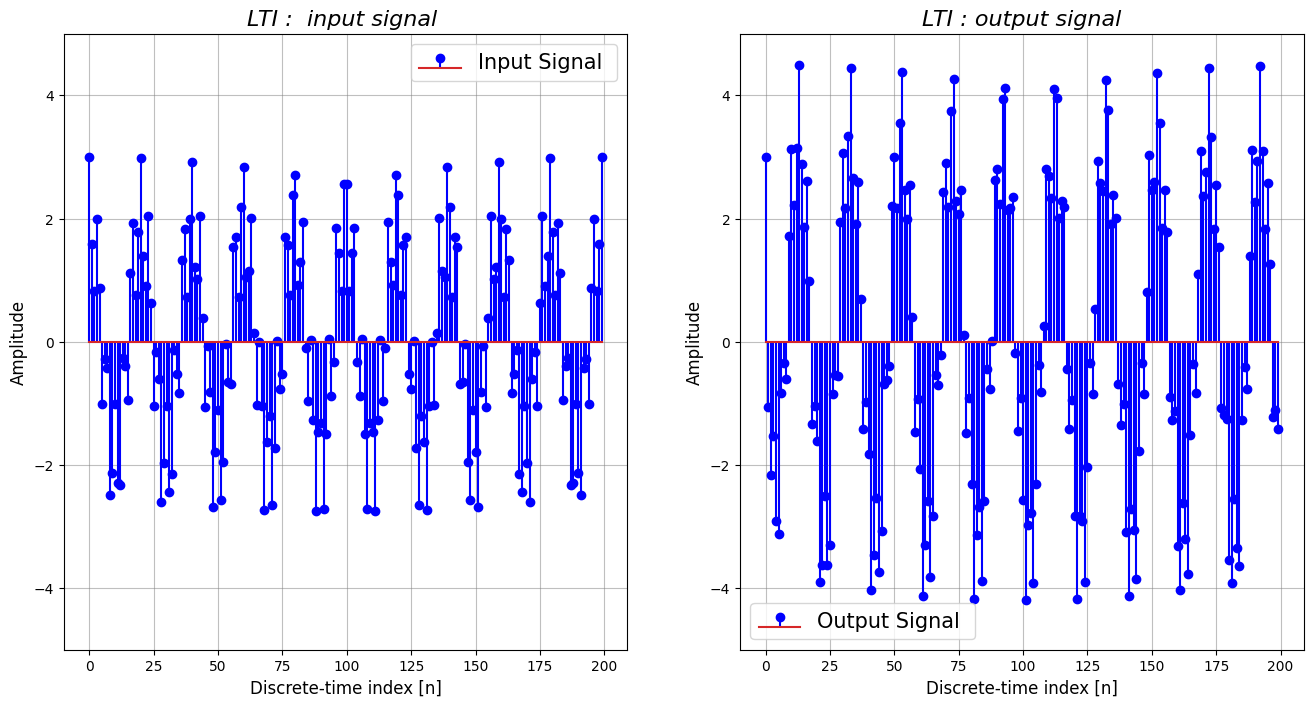

In [ ]:
#https://github.com/jimmyg1997/Python-Digital-Signal-Processing-Basics/blob/main/LTI%20-%20Transfer%20Function%20Estimation%20-%20Impulse%20Step%20Response%20-%20Zero%20Pole%20-%20ROC.ipynb

## 1. Define `x[n]` and `y[n]`
N = 200
n = np.arange(0, N ,1, dtype = float)
u1= 2 *(np.cos(np.pi*t/10))
u2= (np.cos((3 *np.pi*t)/5))
x = u1+u2
y= yout

## 2. Visualize
fig, axs = plt.subplots(1,2, figsize = (16,8))
axs[0].stem(n, x, linefmt = '-b',  markerfmt='bo', label = r"Input Signal ")
axs[0].set_title(r"LTI :  input signal ", size = 16, style = 'italic')
axs[1].stem(n, y, linefmt = '-b',  markerfmt='bo', label = r"Output Signal ")
axs[1].set_title(r"LTI : output signal", size = 16, style = 'italic')

for idx in range(2) :
  axs[idx].set_xlabel('Discrete-time index [n]', fontsize = 12)
  axs[idx].set_ylabel('Amplitude',  fontsize = 12)
  axs[idx].grid(True, color = 'gray', alpha = 0.5)
  axs[idx].legend(fancybox = True, prop = {'size': 15})
  axs[idx].set_ylim(-5, 5)

plt.show()

In [ ]:

def display_tf(b, a, mode):
  b = [round(x,3) for x in b]
  a = [round(x,3) for x in a]
  if mode == "inverse" :  b = b[::-1] ; a = a[::-1]
  print()
  print(" "* 7, end = " ")
  print(b[0], end = " ")
  for z_idx in range(1, len(b)):
    if b[z_idx] > 0 : print("+", end = " ")
    if mode == "inverse" :
      print("{}z^({}) ".format(b[z_idx], -z_idx), end = " ")
    else:
      print("{}z^({}) ".format(b[z_idx], z_idx), end = " ")
  print()
  print("H(z) = " + "-"*max( len(b), len(a) ) * 13)
  print(" "* 7, end = " ")
  print(a[0], end = " ")
  for z_idx in range(1, len(a)):
    if a[z_idx] > 0 : print("+", end = " ")
    if mode == "inverse" :
      print("{}z^({}) ".format(a[z_idx], -z_idx), end = " ")
    else:
      print("{}z^({}) ".format(a[z_idx], z_idx), end = " ")
  print()
  print()
# Calculate db
def db(x):
  return 20 * np.log10(np.abs(x) / np.abs(x).max())

In [ ]:
u1= 2 *(np.cos(np.pi*t/10))
u2= (np.cos((3 *np.pi*t)/5))
b1 = u1+u2
a1= y

#calculate correclty the coefficients of the Z transform in the formation : a0 + a1* z^{-1} + ... + aN * z^
z = sympy.symbols('z')
X = sympy.Poly(np.flipud(b1), z**(-1))
Y = sympy.Poly(np.flipud(a1), z**(-1))

#Calculate Transfer Function H(z)
b3 = np.array( Y.coeffs(), dtype = float)
a3 = np.array( X.coeffs(), dtype = float )
H3 = signal.TransferFunction(b3, a3)

# Display  H(z)
data = pd.DataFrame(np.vstack([x,y]).T, columns = ["Input x[n]", "Output y[n]"], index = n).T
data.index.name = "n-th index"

print("==== Difference Equation that Describes 𝐻(z) ==== ")
display_tf(b3,a3, "inverse")

==== Difference Equation that Describes 𝐻(z) ==== 

        3.0 -1.062z^(-1)  -2.168z^(-2)  -1.535z^(-3)  -2.903z^(-4)  -3.128z^(-5)  -0.826z^(-6)  -0.338z^(-7)  -0.606z^(-8)  + 1.72z^(-9)  + 3.135z^(-10)  + 2.227z^(-11)  + 3.15z^(-12)  + 4.488z^(-13)  + 2.88z^(-14)  + 1.859z^(-15)  + 2.606z^(-16)  + 0.985z^(-17)  -1.342z^(-18)  -1.038z^(-19)  -1.611z^(-20)  -3.899z^(-21)  -3.63z^(-22)  -2.509z^(-23)  -3.625z^(-24)  -3.296z^(-25)  -0.846z^(-26)  -0.542z^(-27)  -0.56z^(-28)  + 1.945z^(-29)  + 3.064z^(-30)  + 2.172z^(-31)  + 3.345z^(-32)  + 4.446z^(-33)  + 2.662z^(-34)  + 1.912z^(-35)  + 2.593z^(-36)  + 0.691z^(-37)  -1.42z^(-38)  -0.974z^(-39)  -1.829z^(-40)  -4.031z^(-41)  -3.465z^(-42)  -2.536z^(-43)  -3.738z^(-44)  -3.077z^(-45)  -0.679z^(-46)  -0.619z^(-47)  -0.401z^(-48)  + 2.2z^(-49)  + 2.996z^(-50)  + 2.163z^(-51)  + 3.551z^(-52)  + 4.372z^(-53)  + 2.463z^(-54)  + 1.988z^(-55)  + 2.548z^(-56)  + 0.395z^(-57)  -1.463z^(-58)  -0.929z^(-59)  -2.065z^(-60)  -4.125z^(-61)  -3.297z^(-6

## d) Using the difference equation, find the output of the system

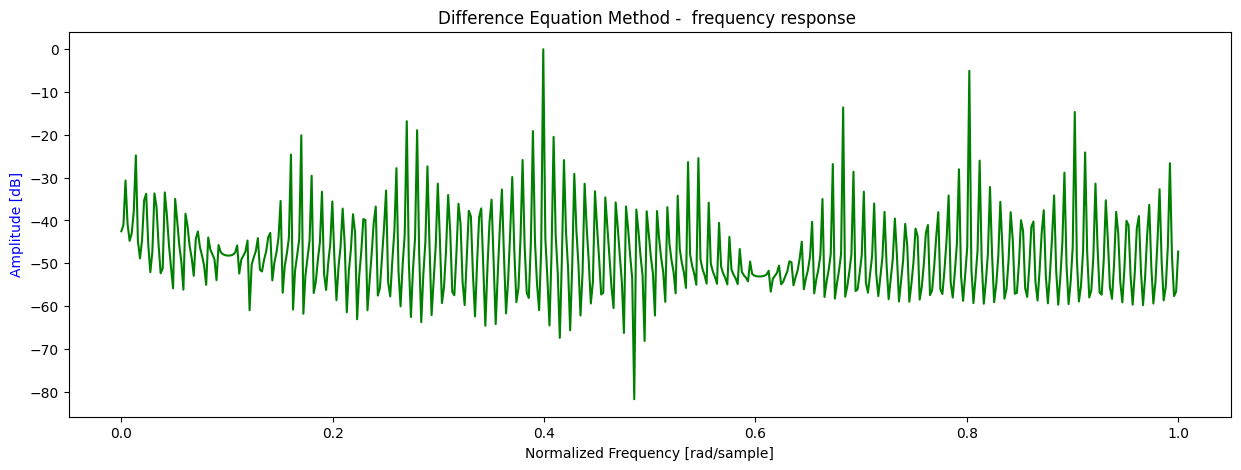

In [ ]:
#Frequency Response
def plot_freq_response(w, Y,  method = ""):
  magnitude = db(abs(Y))
  angles    = np.unwrap(np.angle(Y))
  #fig = plt.figure()
  #ax1 = fig.add_subplot(111)
  fig, ax1 = plt.subplots(1,1,figsize=(15,5))
  plt.title(method + r' frequency response ')
  plt.plot(w, magnitude , 'g', label = "magnitude")
  plt.ylabel('Amplitude [dB]', color='b')
  plt.xlabel('Normalized Frequency [rad/sample]')

## Frequency Calculation
w3, Y3 = signal.freqz(b3, a3)
plot_freq_response(w3, Y3,"Difference Equation Method - ")